In [1]:
# df = dd.read_parquet(
#     "data/censo2024-microdatos/personas",
#     filters=[[("region", "==", 13)]],
# )

In [2]:
REGION = 13

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd
import geopandas as gpd

In [5]:
import dask.dataframe as dd

In [6]:
def to_int_if_possible(series):
    try:
        return series.astype("Int32")
    except ValueError:
        print(
            f"Conversion to Int32 failed for series '{series.name}'; returning original."
        )
        return series


to_int_if_possible(pd.Series(["1", "2", "3", None, "blah"], name="example_series")).map(
    lambda x: type(x)
)
to_int_if_possible(pd.Series([1, 2, 3, None])).map(lambda x: type(x))

Conversion to Int32 failed for series 'example_series'; returning original.


0    <class 'float'>
1    <class 'float'>
2    <class 'float'>
3    <class 'float'>
dtype: object

In [7]:
def to_int_value(x):
    try:
        return pd.NA if x is None else int(x)
    except:
        return x


to_int_value(None)

<NA>

In [8]:
def load_tabla(filepath) -> pd.DataFrame:
    df = pd.read_csv(
        filepath,
        index_col="Nombre variable",
        thousands=",",
        decimal=".",
    ).drop("Entidad", axis=1)

    df["Valor"] = df["Valor"].map(to_int_value)
    return df


dic_hogares = load_tabla("../data/censo2024-microdatos/tabla_hogares.csv")
dic_hogares

,Descripción de la variable,Valor,Etiqueta de categoría,Rango,Universo,Conteo
Nombre variable,,,,,,
id_vivienda,Llave identificadora de la vivienda o de la en...,1:7664466,Válidos,1:7664466,Todos los registros,6622597
id_hogar,Llave identificadora de hogar,0:26,Válidos,0:26,Todos los registros,6622597
region,Región,1:16,Ver diccionario códigos territoriales,1:16,Todos los hogares,6622597
provincia,Provincia,11:163,Ver diccionario códigos territoriales,11:163,Todos los hogares,6622597
comuna,Comuna,1101:16305,Ver diccionario códigos territoriales,1101:16305,Todos los hogares,6622597
...,...,...,...,...,...,...
tipologia_hogar,Tipología de hogar,6,Compuesto,1:7; NA (no aplica),Todos los hogares,112706
tipologia_hogar,Tipología de hogar,7,Sin núcleo,1:7; NA (no aplica),Todos los hogares,378267
tipologia_hogar,Tipología de hogar,NaN,No aplica,1:7; NA (no aplica),Todos los hogares,26070


In [9]:
dic_viviendas = load_tabla("../data/censo2024-microdatos/tabla_viviendas.csv")
dic_viviendas

,Descripción de la variable,Valor,Etiqueta de categoría,Rango,Universo,Conteo
Nombre variable,,,,,,
id_vivienda,Llave identificadora de la vivienda o de la en...,1:7664466,Válidos,1:7664466,Todos los registros,7664466
region,Región,1:16,Ver diccionario códigos territoriales,1:16,Todos los registros,7664466
provincia,Provincia,11:163,Ver diccionario códigos territoriales,11:163,Todos los registros,7664466
comuna,Comuna,1101:16305,Ver diccionario códigos territoriales,1101:16305,Todos los registros,7664466
area,Área urbana o rural,1,Urbano,1:2,Todos los registros,6366114
...,...,...,...,...,...,...
indice_hacinamiento,Índice de hacinamiento,3,Vivienda con hacinamiento crítico,1:3;\n-99 (no respuesta); \nNA (no aplica),Todas las viviendas particulares ocupadas con ...,36231
indice_hacinamiento,Índice de hacinamiento,-99,No respuesta,1:3;\n-99 (no respuesta); \nNA (no aplica),Todas las viviendas particulares ocupadas con ...,1034
indice_hacinamiento,Índice de hacinamiento,NaN,No aplica,1:3;\n-99 (no respuesta); \nNA (no aplica),Todas las viviendas particulares ocupadas con ...,1256294


In [10]:
chile_comunas = gpd.read_file("../data/processed/chile_comunas.geojson")
valparaiso = gpd.read_file("../data/processed/region_valparaiso.geojson")
gran_santiago = gpd.read_file("../data/processed/region_metropolitana.geojson")
biobio = gpd.read_file("../data/processed/region_biobio.geojson")

if REGION == 8:
    carto = biobio
elif REGION == 13:
    carto = gran_santiago
elif REGION == 5:
    carto = valparaiso
else:
    carto = chile_comunas

In [11]:
def read_parquet(filepath, filters=None):
    df = pd.read_parquet(filepath, filters=filters)
    for col in df.select_dtypes(include="number").columns:
        df[col] = to_int_if_possible(df[col])
    return df


hogares = read_parquet(
    "../data/raw/hogares_censo2024.parquet",
    filters=[[("region", "==", REGION)]],
)
hogares

,id_vivienda,id_hogar,region,provincia,comuna,comuna_bajo_umbral,area,tipo_operativo,p12_tenencia_viv,p13_comb_cocina,p14_comb_calefaccion,p15a_serv_tel_movil,p15b_serv_compu,p15c_serv_tablet,p15d_serv_internet_fija,p15e_serv_internet_movil,p15f_serv_internet_satelital,tipologia_hogar
0,6,1,13,131,13124,2,1,2,1,1,1,1,2,2,1,2,1,4
1,9,1,13,131,13101,2,1,2,1,1,1,2,2,2,2,2,2,3
2,11,1,13,131,13101,2,1,2,6,6,6,1,1,1,1,1,2,7
3,14,1,13,136,13603,2,1,2,1,1,3,1,2,2,2,1,1,5
4,16,1,13,131,13124,2,1,2,4,1,8,1,2,2,2,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609436,7664455,1,13,134,13401,2,1,2,3,1,1,1,1,2,1,1,2,4
2609437,7664457,1,13,131,13129,2,1,2,3,6,8,1,1,2,1,1,2,5
2609438,7664458,1,13,131,13108,2,1,2,3,6,6,1,1,2,1,1,2,7
2609439,7664460,1,13,131,13106,2,1,2,3,6,6,1,2,2,1,1,2,1


In [12]:
def get_mapping_variable(variable: str, dic: pd.DataFrame) -> dict:
    if variable not in dic.index:
        raise ValueError(f"Variable '{variable}' not found in dictionary.")

    mapping = (
        dic.loc[variable]
        .reset_index(drop=True)
        .set_index("Valor")["Etiqueta de categoría"]
        .to_dict()
    )

    return mapping


mapped_calef = get_mapping_variable("p14_comb_calefaccion", dic_hogares)
mapped_calef

{1: 'Gas',
 2: 'Parafina o petróleo',
 3: 'Leña',
 4: 'Pellet',
 5: 'Carbón',
 6: 'Electricidad',
 7: 'Otra',
 8: 'No utiliza fuente de energía o combustible para calefaccionar',
 -99: 'No respuesta',
 nan: 'No aplica'}

In [13]:
calefaccion = (
    hogares.groupby("comuna")["p14_comb_calefaccion"].value_counts().unstack().fillna(0)
)
calefaccion.columns = calefaccion.columns.map(mapped_calef)
calefaccion.columns.name = "Combustible de calefacción"
calefaccion

Combustible de calefacción,No respuesta,Gas,Parafina o petróleo,Leña,Pellet,Carbón,Electricidad,Otra,No utiliza fuente de energía o combustible para calefaccionar
comuna,,,,,,,,,
13101,76,31168,9395,104,31,39,109464,1676,54505
13102,47,11949,4904,57,23,19,6138,101,4948
13103,23,20712,8286,98,27,57,5321,87,7253
13104,2,18678,7740,60,33,26,7245,89,6854
13105,8,23022,11038,153,50,38,8271,160,7493
13106,14,17825,6788,50,26,31,26776,275,15937
13107,3,11985,6709,106,79,23,9136,163,3761
13108,5,11274,3692,38,11,16,16791,207,13377
13109,3,13589,5390,39,45,15,12759,107,6095


In [14]:
calefaccion_percent = calefaccion.div(calefaccion.sum(axis=1), axis=0)
calefaccion_percent

Combustible de calefacción,No respuesta,Gas,Parafina o petróleo,Leña,Pellet,Carbón,Electricidad,Otra,No utiliza fuente de energía o combustible para calefaccionar
comuna,,,,,,,,,
13101,0.000368,0.150965,0.045506,0.000504,0.00015,0.000189,0.5302,0.008118,0.264
13102,0.001667,0.423934,0.173987,0.002022,0.000816,0.000674,0.217768,0.003583,0.175548
13103,0.000549,0.494745,0.197927,0.002341,0.000645,0.001362,0.127102,0.002078,0.173251
13104,0.000049,0.458615,0.190046,0.001473,0.00081,0.000638,0.177892,0.002185,0.168291
13105,0.000159,0.458304,0.219736,0.003046,0.000995,0.000756,0.164653,0.003185,0.149165
13106,0.000207,0.263208,0.100233,0.000738,0.000384,0.000458,0.395381,0.004061,0.23533
13107,0.000094,0.374941,0.209886,0.003316,0.002471,0.00072,0.285813,0.005099,0.11766
13108,0.00011,0.248266,0.081302,0.000837,0.000242,0.000352,0.369756,0.004558,0.294576
13109,0.000079,0.35721,0.141686,0.001025,0.001183,0.000394,0.335392,0.002813,0.160218


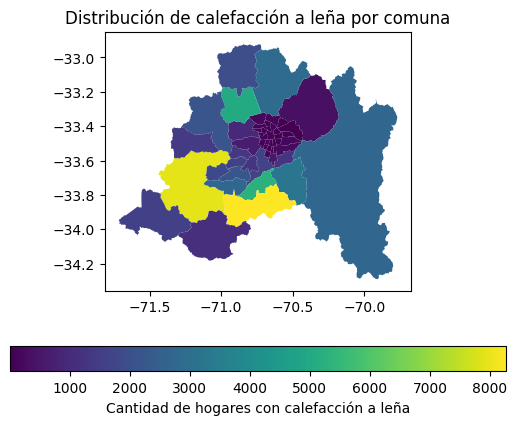

In [15]:
calefaccion_test = carto.set_index("COD_COM").join(calefaccion)

ax = calefaccion_test.plot(
    column="Leña",
    legend=True,
    legend_kwds={
        "label": "Cantidad de hogares con calefacción a leña",
        "orientation": "horizontal",
    },
)
ax.set_title("Distribución de calefacción a leña por comuna")
plt.show()

In [16]:
def to_lines(text, max_words_per_line=5):
    words = text.split()
    lines = []
    for i in range(0, len(words), max_words_per_line):
        lines.append(" ".join(words[i : i + max_words_per_line]))
    return "\n".join(lines)

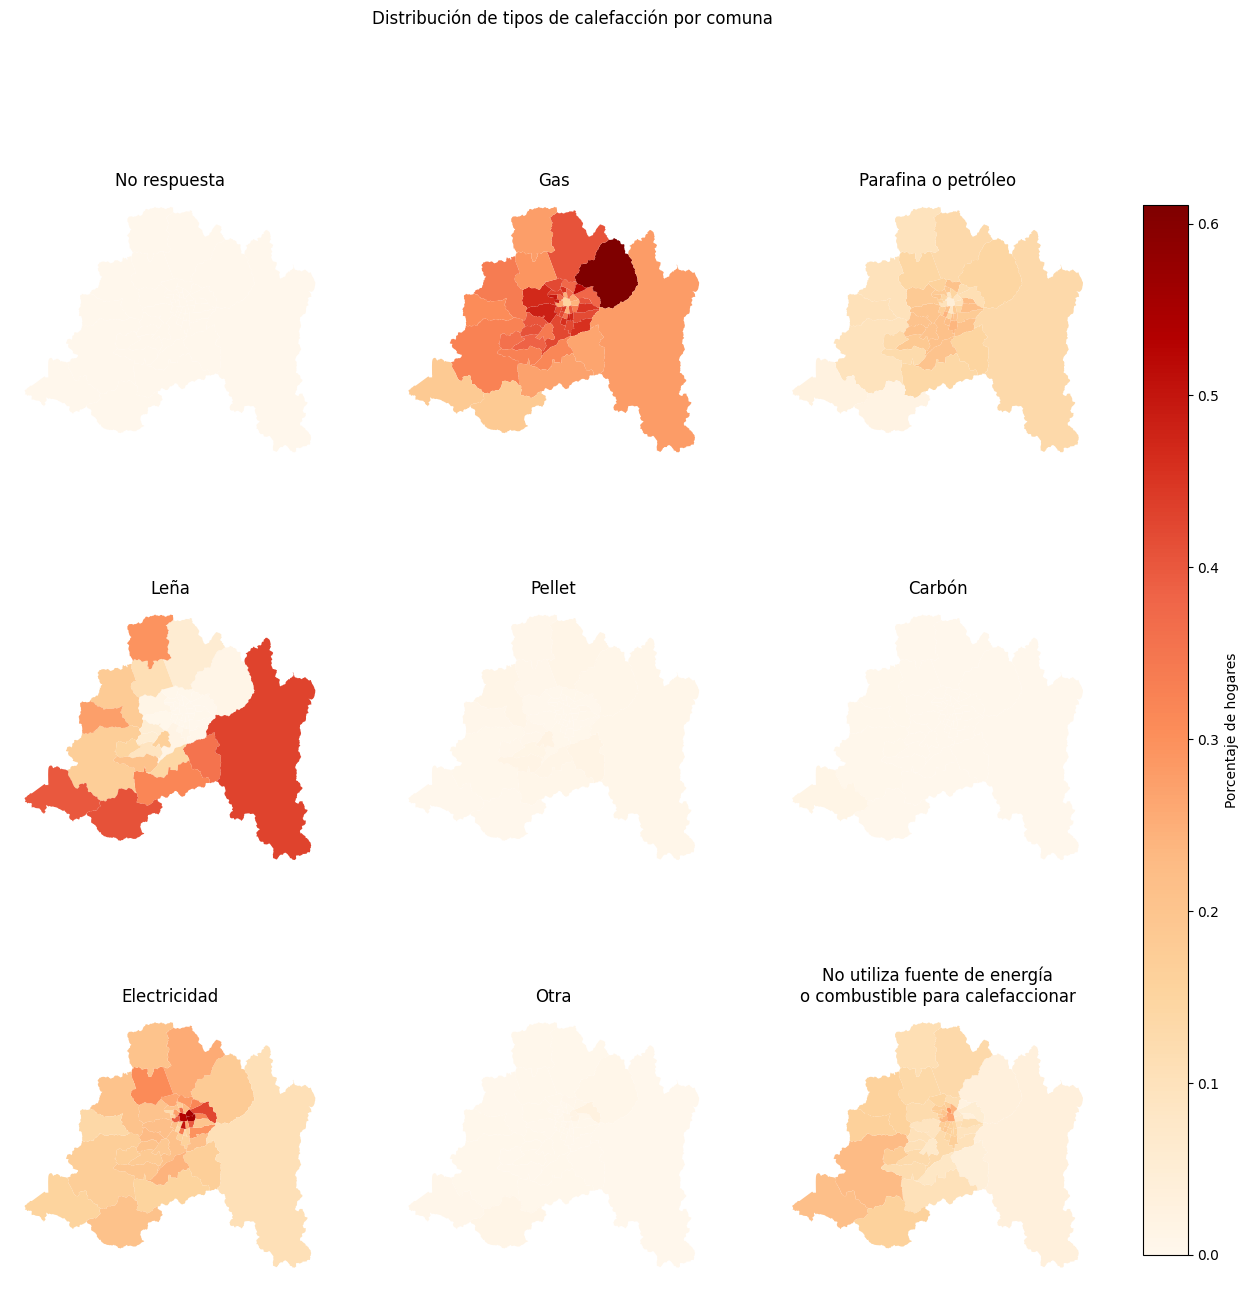

In [17]:
def plot_calefaccion(calefaccion, gdf):
    # Selecciona las columnas a graficar (puedes ajustar esta lista)
    columns = calefaccion.columns.tolist()

    cmap = "OrRd"

    ncols = 3  # Número de columnas de subplots
    nrows = int(np.ceil(len(columns) / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()

    calefaccion_percent_gdf = gdf.set_index("COD_COM").join(calefaccion)
    vmin = calefaccion_percent_gdf[columns].min().min()
    vmax = calefaccion_percent_gdf[columns].max().max()

    for i, col in enumerate(columns):
        ax = axes[i]
        calefaccion_percent_gdf.plot(
            column=col, ax=ax, legend=False, vmin=vmin, vmax=vmax, cmap=cmap
        )
        title = to_lines(col, max_words_per_line=5)
        ax.set_title(title)
        ax.axis("off")

    # Elimina ejes vacíos si hay menos mapas que subplots
    total_plots = nrows * ncols
    for j in range(len(columns), total_plots):
        fig.delaxes(axes[j])

    # Agrega una sola barra de color (leyenda) grande
    fig.subplots_adjust(right=0.85)
    cax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label("Porcentaje de hogares")

    plt.suptitle("Distribución de tipos de calefacción por comuna")
    plt.show()


plot_calefaccion(calefaccion_percent, carto)

In [18]:
# plot_calefaccion(calefaccion_percent, valparaiso)

In [19]:
# plot_calefaccion(calefaccion_percent, biobio)

In [20]:
viviendas = read_parquet(
    "../data/raw/viviendas_censo2024.parquet", filters=[[("region", "==", REGION)]]
)
viviendas

,id_vivienda,region,provincia,comuna,comuna_bajo_umbral,area,tipo_operativo,cant_hog,cant_per,p2_tipo_vivienda,...,p5_num_dormitorios,p6_fuente_agua,p7_distrib_agua,p8_serv_hig,p9_fuente_elect,p10_basura,p11a_num_personas,p11b_comparte_gasto,p11c_num_hogar,indice_hacinamiento
0,6,13,131,13124,2,1,2,1,4,1,...,3,1,1,1,1,1,4,1,<NA>,1
1,9,13,131,13101,2,1,2,1,2,1,...,3,1,1,1,1,1,2,1,<NA>,1
2,11,13,131,13101,2,1,2,1,2,3,...,2,1,1,1,1,1,2,1,<NA>,1
3,12,13,131,13120,2,1,2,0,0,3,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,14,13,136,13603,2,1,2,1,4,1,...,1,1,1,3,1,1,4,1,<NA>,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773202,7664455,13,134,13401,2,1,2,1,5,1,...,3,1,1,1,1,1,5,1,<NA>,1
2773203,7664457,13,131,13129,2,1,2,1,7,3,...,3,1,1,1,1,1,7,1,<NA>,1
2773204,7664458,13,131,13108,2,1,2,1,2,3,...,1,1,1,1,1,1,2,1,<NA>,1
2773205,7664460,13,131,13106,2,1,2,1,1,3,...,2,1,1,1,1,1,1,<NA>,<NA>,1


In [21]:
# Coded by @Facondi
def crear_indice_materialidad(df):
    """Crea un índice de materialidad basado en paredes, techo y piso. Escala: 1 (Buena) a 3 (Deficiente)"""
    df = df.copy()

    df["mat_paredes_score"] = (
        df["p4a_mat_paredes"]
        .map({1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, -99: 2})
        .fillna(2)
    )

    df["mat_techo_score"] = (
        df["p4b_mat_techo"]
        .map({1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, -99: 2})
        .fillna(2)
    )

    df["mat_piso_score"] = (
        df["p4c_mat_piso"].map({1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, -99: 2}).fillna(2)
    )

    df["indice_materialidad"] = (
        df["mat_paredes_score"] * 0.40
        + df["mat_techo_score"] * 0.35
        + df["mat_piso_score"] * 0.25
    )

    df["categoria_materialidad"] = pd.cut(
        df["indice_materialidad"],
        bins=[0, 1.5, 2.25, 3],
        labels=["Buena", "Regular", "Deficiente"],
    )
    return df


viviendas = crear_indice_materialidad(viviendas)
print(viviendas["categoria_materialidad"].value_counts())

categoria_materialidad
Buena         2148729
Regular        620461
Deficiente       4017
Name: count, dtype: int64


In [22]:
tipo_vivienda = get_mapping_variable("p2_tipo_vivienda", dic_viviendas)
tipo_vivienda

{1: 'Casa',
 3: 'Departamento',
 5: 'Vivienda tradicional indígena (ruka u otras)',
 6: 'Pieza en casa antigua o en conventillo',
 7: 'Mediagua, mejora, vivienda de emergencia, rancho o choza',
 8: 'Móvil (carpa, casa rodante o similar)',
 9: 'Otro tipo de vivienda particular',
 nan: 'No aplica'}

In [23]:
columns_to_merge = [
    "region",
    "provincia",
    "comuna",
    "id_vivienda",
    "p2_tipo_vivienda",
    "categoria_materialidad",
]
viviendas[columns_to_merge]

,region,provincia,comuna,id_vivienda,p2_tipo_vivienda,categoria_materialidad
0,13,131,13124,6,1,Buena
1,13,131,13101,9,1,Regular
2,13,131,13101,11,3,Buena
3,13,131,13120,12,3,Regular
4,13,136,13603,14,1,Buena
...,...,...,...,...,...,...
2773202,13,134,13401,7664455,1,Buena
2773203,13,131,13129,7664457,3,Buena
2773204,13,131,13108,7664458,3,Buena
2773205,13,131,13106,7664460,3,Buena


In [24]:
hogares = hogares.merge(viviendas[columns_to_merge], how="left", validate="many_to_one")
hogares

,id_vivienda,id_hogar,region,provincia,comuna,comuna_bajo_umbral,area,tipo_operativo,p12_tenencia_viv,p13_comb_cocina,p14_comb_calefaccion,p15a_serv_tel_movil,p15b_serv_compu,p15c_serv_tablet,p15d_serv_internet_fija,p15e_serv_internet_movil,p15f_serv_internet_satelital,tipologia_hogar,p2_tipo_vivienda,categoria_materialidad
0,6,1,13,131,13124,2,1,2,1,1,1,1,2,2,1,2,1,4,1,Buena
1,9,1,13,131,13101,2,1,2,1,1,1,2,2,2,2,2,2,3,1,Regular
2,11,1,13,131,13101,2,1,2,6,6,6,1,1,1,1,1,2,7,3,Buena
3,14,1,13,136,13603,2,1,2,1,1,3,1,2,2,2,1,1,5,1,Buena
4,16,1,13,131,13124,2,1,2,4,1,8,1,2,2,2,1,2,7,1,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609436,7664455,1,13,134,13401,2,1,2,3,1,1,1,1,2,1,1,2,4,1,Buena
2609437,7664457,1,13,131,13129,2,1,2,3,6,8,1,1,2,1,1,2,5,3,Buena
2609438,7664458,1,13,131,13108,2,1,2,3,6,6,1,1,2,1,1,2,7,3,Buena
2609439,7664460,1,13,131,13106,2,1,2,3,6,6,1,2,2,1,1,2,1,3,Buena


In [25]:
calefaccion_calidad = (
    hogares.groupby(["comuna", "categoria_materialidad", "p14_comb_calefaccion"])
    .size()
    .unstack()
)
calefaccion_calidad.columns = calefaccion_calidad.columns.map(mapped_calef)
# calefaccion.columns.name = "Combustible de calefacción"
calefaccion_calidad

/var/folders/73/mp1vchxj68b8gzsk0npql1w00000gn/T/ipykernel_54360/180378309.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hogares.groupby(["comuna", "categoria_materialidad", "p14_comb_calefaccion"])


p14_comb_calefaccion           No respuesta    Gas  Parafina o petróleo  Leña  \
comuna categoria_materialidad                                                   
13101  Buena                             28  25452                 7363    49   
       Regular                           46   5474                 1941    49   
       Deficiente                         2    242                   91     6   
13102  Buena                              9  10209                 4143    29   
       Regular                           38   1726                  759    25   
...                                     ...    ...                  ...   ...   
13604  Regular                            1   2210                 1324   734   
       Deficiente                         0      7                    2     4   
13605  Buena                              5  10289                 5173   984   
       Regular                            3   2307                 1298   626   
       Deficiente                         0     10                    9    11   

p14_comb_calefaccion           Pellet  Carbón  Electricidad  Otra  \
comuna categoria_materialidad                                       
13101  Buena                       25      33        106032  1633   
       Regular                      6       6          3315    40   
       Deficiente                   0       0           117     3   
13102  Buena                       20       9          5559    86   
       Regular                      3       9           578    13   
...                               ...     ...           ...   ...   
13604  Regular                     12      13           740    12   
       Deficiente                   1       2             5     1   
13605  Buena                      160      15          5499    88   
       Regular                     22       8           866    16   
       Deficiente                   0       0             4     1   

p14_comb_calefaccion           No utiliza fuente de energía o combustible para calefaccionar  
comuna categoria_materialidad                                                                 
13101  Buena                                                               47021              
       Regular                                                              7171              
       Deficiente                                                            313              
13102  Buena                                                                3257              
       Regular                                                              1673              
...                                                                          ...              
13604  Regular                                                               970              
       Deficiente                                                              9              
13605  Buena                                                                2351              
       Regular                                                               942              
       Deficiente                                                             26              

[156 rows x 9 columns]

In [26]:
calefaccion_calidad.groupby(level="comuna").sum().sum(axis=1)

comuna
13101    206458
13102     28186
13103     41864
13104     40727
13105     50233
13106     67722
13107     31965
13108     45411
13109     38042
13110    133631
13111     37118
13112     53951
13113     30574
13114    116176
13115     32458
13116     27387
13117     31862
13118     47555
13119    167383
13120    108555
13121     32328
13122     76078
13123     69157
13124     74144
13125     65059
13126     45700
13127     55579
13128     46397
13129     33461
13130     60243
13131     24963
13132     31114
13201    182855
13202      9183
13203      6368
13301     50926
13302     45445
13303      6585
13401     98580
13402     37620
13403      7852
13404     25871
13501     46457
13502      2770
13503     12001
13504      5247
13505      3973
13601     24425
13602     12141
13603     12989
13604     26139
13605     30713
dtype: int64

In [27]:
calefaccion_calidad_percent = calefaccion_calidad.div(
    # calefaccion_calidad.sum(axis=1),
    calefaccion_calidad.groupby(level="comuna")
    .sum()
    .sum(axis=1),  # normaliza por comuna
    axis=0,
)
calefaccion_calidad_percent

p14_comb_calefaccion           No respuesta       Gas  Parafina o petróleo  \
comuna categoria_materialidad                                                
13101  Buena                       0.000136  0.123279             0.035663   
       Regular                     0.000223  0.026514             0.009401   
       Deficiente                  0.000010  0.001172             0.000441   
13102  Buena                       0.000319  0.362201             0.146988   
       Regular                     0.001348  0.061236             0.026928   
...                                     ...       ...                  ...   
13604  Regular                     0.000038  0.084548             0.050652   
       Deficiente                  0.000000  0.000268             0.000077   
13605  Buena                       0.000163  0.335005             0.168430   
       Regular                     0.000098  0.075115             0.042262   
       Deficiente                  0.000000  0.000326             0.000293   

p14_comb_calefaccion               Leña    Pellet    Carbón  Electricidad  \
comuna categoria_materialidad                                               
13101  Buena                   0.000237  0.000121  0.000160      0.513577   
       Regular                 0.000237  0.000029  0.000029      0.016057   
       Deficiente              0.000029  0.000000  0.000000      0.000567   
13102  Buena                   0.001029  0.000710  0.000319      0.197226   
       Regular                 0.000887  0.000106  0.000319      0.020507   
...                                 ...       ...       ...           ...   
13604  Regular                 0.028081  0.000459  0.000497      0.028310   
       Deficiente              0.000153  0.000038  0.000077      0.000191   
13605  Buena                   0.032039  0.005210  0.000488      0.179045   
       Regular                 0.020382  0.000716  0.000260      0.028197   
       Deficiente              0.000358  0.000000  0.000000      0.000130   

p14_comb_calefaccion               Otra  \
comuna categoria_materialidad             
13101  Buena                   0.007910   
       Regular                 0.000194   
       Deficiente              0.000015   
13102  Buena                   0.003051   
       Regular                 0.000461   
...                                 ...   
13604  Regular                 0.000459   
       Deficiente              0.000038   
13605  Buena                   0.002865   
       Regular                 0.000521   
       Deficiente              0.000033   

p14_comb_calefaccion           No utiliza fuente de energía o combustible para calefaccionar  
comuna categoria_materialidad                                                                 
13101  Buena                                                            0.227751              
       Regular                                                          0.034733              
       Deficiente                                                       0.001516              
13102  Buena                                                            0.115554              
       Regular                                                          0.059356              
...                                                                          ...              
13604  Regular                                                          0.037109              
       Deficiente                                                       0.000344              
13605  Buena                                                            0.076547              
       Regular                                                          0.030671              
       Deficiente                                                       0.000847              

[156 rows x 9 columns]

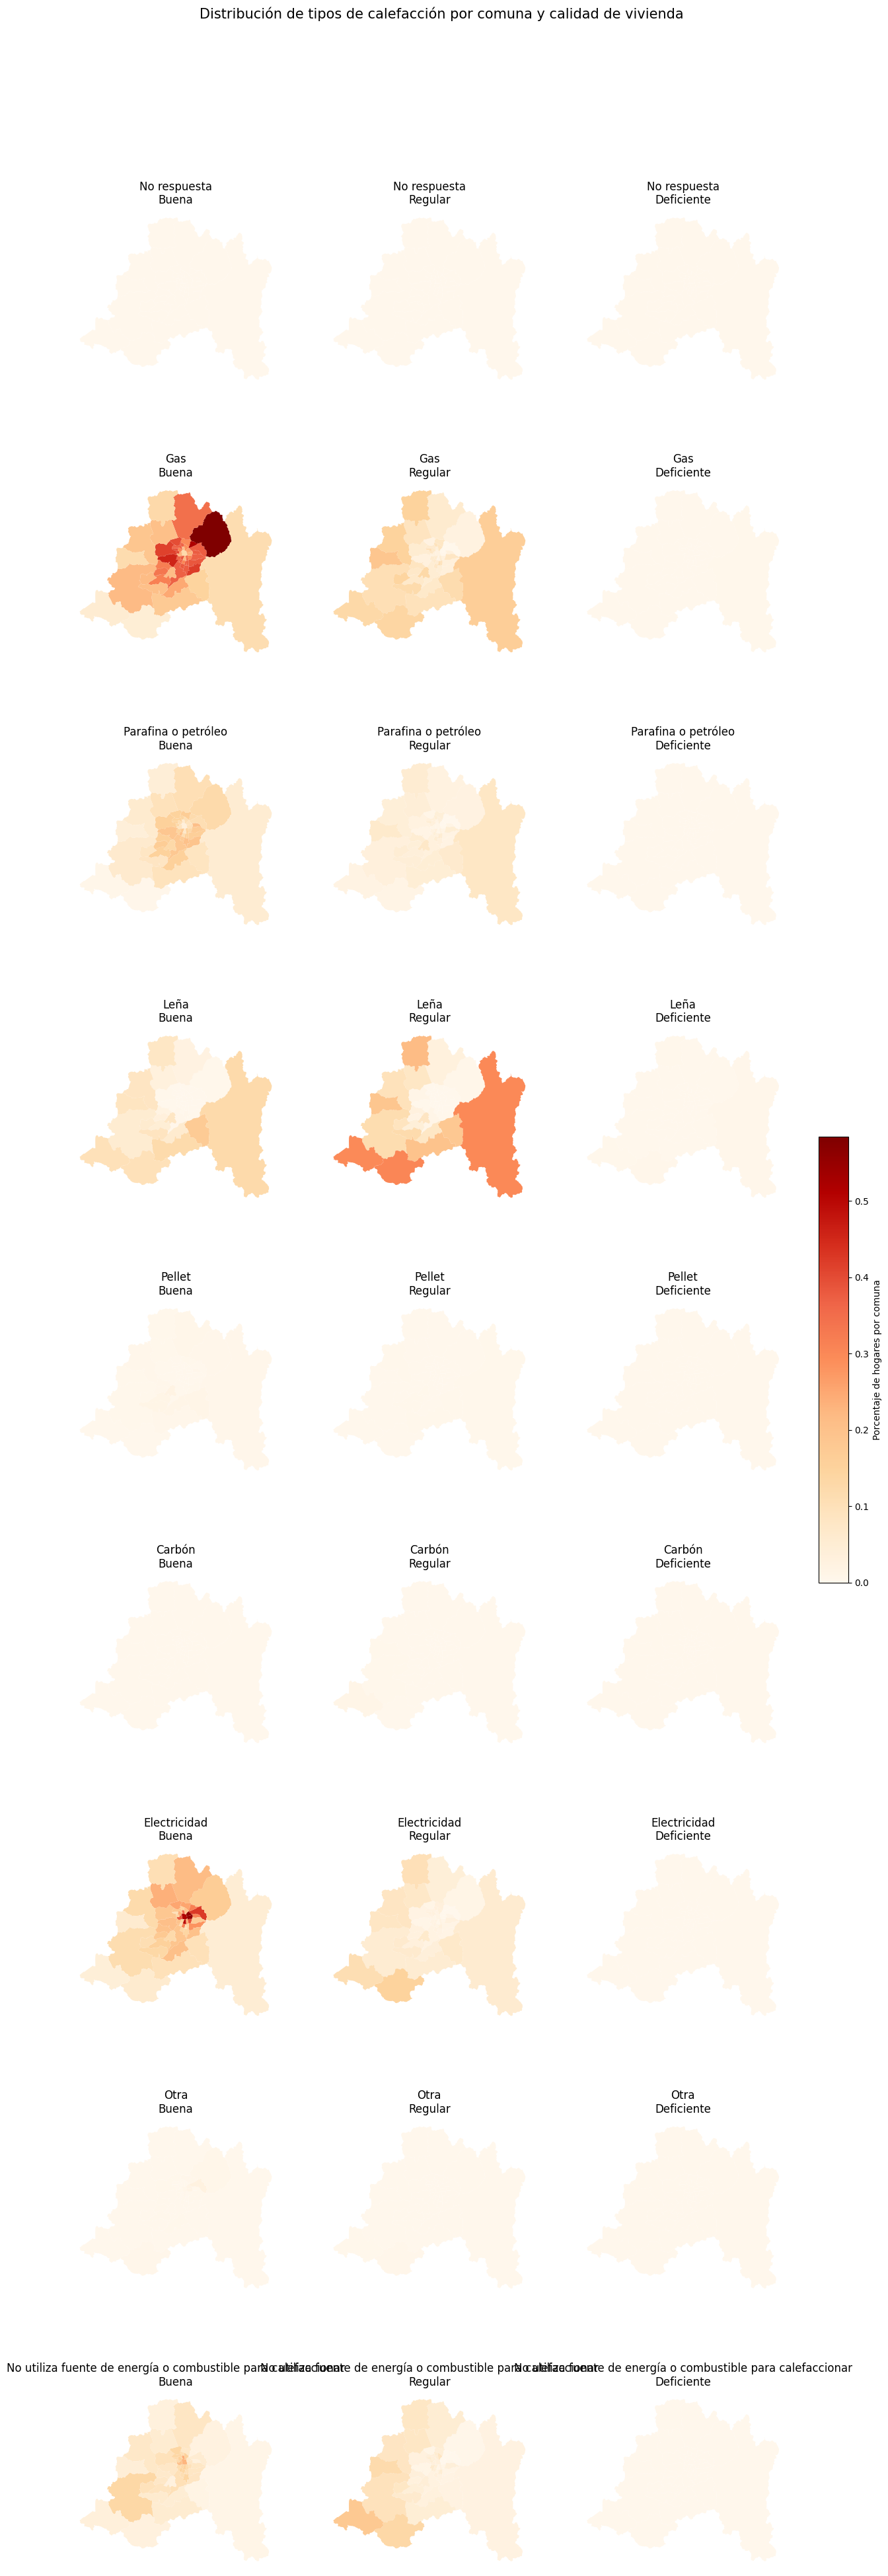

In [28]:
def plot_calefaccion_calidad(calefaccion, gdf, cmap="OrRd"):
    materialidad_cats = calefaccion.index.get_level_values(
        "categoria_materialidad"
    ).unique()
    calefaccion_types = calefaccion.columns.tolist()

    ncols = len(materialidad_cats)
    nrows = len(calefaccion_types)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))

    vmin = calefaccion.min().min()
    vmax = calefaccion.max().max()

    for col_idx, mat_cat in enumerate(materialidad_cats):
        for row_idx, calef_type in enumerate(calefaccion_types):
            ax = axes[row_idx, col_idx]
            # Filter for materialidad category
            df = calefaccion.xs(mat_cat, level="categoria_materialidad")
            # Join with geo
            map_df = gdf.set_index("COD_COM").join(df[calef_type])
            map_df.plot(
                column=calef_type,
                ax=ax,
                legend=False,
                cmap=cmap,
                vmin=vmin,
                vmax=vmax,
            )
            ax.set_title(f"{calef_type}\n{mat_cat}")
            ax.axis("off")

    # Agrega una sola barra de color (leyenda) más corta y a la derecha
    fig.subplots_adjust(right=0.85, top=0.92)  # Deja espacio arriba para el título
    cax = fig.add_axes([0.88, 0.45, 0.03, 0.15])  # Más corta y centrada verticalmente
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label("Porcentaje de hogares por comuna")
    fig.suptitle(
        "Distribución de tipos de calefacción por comuna y calidad de vivienda",
        fontsize=15,
    )  # Ajusta la posición del título arriba
    # plt.tight_layout(rect=[0, 0, 0.85, 0.92])  # Deja espacio a la derecha y arriba
    plt.show()


plot_calefaccion_calidad(calefaccion_calidad_percent, carto)